# Data Analysis in Geoscience Remote Sensing Projects: Exercises [2021]
## Solutions to tasks: Regression

Hendrik Andersen | contact: hendrik.andersen@kit.edu

__Tasks:__

1. Compute the RSS (residual sum of squares) and RSE (residual standard error) for the regression model
2. Create a residual plot to analyse the residuals. Are there any issues with the data?
3. Interpret the p-value: Can we reject the 0-hypothesis that there is no relationship between X and y? 
4. Compute the R$^2$ statistic: How much (%) of the variation in y is explained by X?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read in data as pandas dataframe
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Total": "total", 
                        "Fremont Bridge East Sidewalk": "east",
                        "Fremont Bridge West Sidewalk": "west"}) 

X = df['east'].resample('m').mean()
y = df['west'].resample('m').mean()
z = df['total'].resample('m').mean()

Residual sum of squares is : 19659.687863534757
Residual standard error  is : 13.13215147307205


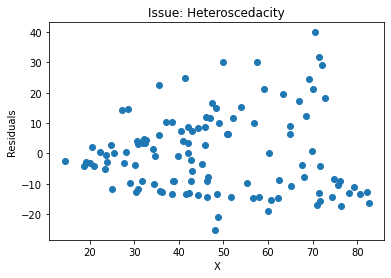

In [2]:
from sklearn.linear_model import LinearRegression
import math

regr = LinearRegression()
X_ = np.expand_dims(X, axis = 1)
regr.fit(X_,y)
y_pred = regr.predict(X_)

RSS = np.sum(np.square(y_pred - y))
RSE = math.sqrt(RSS / (len(y) - 2))


print('Residual sum of squares is : '+ str(RSS))
print('Residual standard error  is : '+ str(RSE))
residuals = (y-y_pred)
plt.scatter(X,residuals)
plt.ylabel('Residuals')
plt.xlabel('X')
plt.title('Issue: Heteroscedacity')
plt.show()

In [3]:
from scipy import stats
slope, intercept, rvalue, pvalue, stderr = stats.linregress(X,y)
print('Can we reject the 0-hypothesis that there is no relationship between X and y?: '  + str(pvalue < 0.05))

Can we reject the 0-hypothesis that there is no relationship between X and y?: True


In [4]:
from sklearn.metrics import r2_score
print('R2 statistic: %.2f' % r2_score(y, y_pred))
print('The regression explains 64% of the variability in y')

R2 statistic: 0.64
The regression explains 64% of the variability in y


__Tasks:__

1. Compute a confidence interval for the two groups of data split with train_test_split. What is the reason for the differences in the range of the confidence interval?
2. Calculate a regression analysis for the outlier and high-leverage data and create a plot. Which of the issues (outlier/leverage) is more critical for sensitivity estimation?
3. Why is the line of the average slope_list approaching the true sensitivity?

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # the random_state argument creates pseudo (reproducable) random data 

res_train = stats.linregress(X_train,y_train)
res_test = stats.linregress(X_test,y_test)

# here, we define a function that returns the confidence interval for the slope and the intercept 
def conf_int(X, model, p = 0.05):
    """
    This function calculates a confidence interval for a slope and intercept of a linear model.
    Only works when the model provided is a scipy.stats.linregress() model.
    Returns: confidence interval for a slope and intercept 
    """
    from scipy.stats import t
    ts = abs(t.ppf(p/2, len(X)-2))
    slope_ci = model.stderr*ts
    intercept_ci = model.intercept_stderr*ts
    return slope_ci, intercept_ci

slope_ci_train, intercept_ci_train = conf_int(X_train, res_train)
slope_ci_test, intercept_ci_test = conf_int(X_test, res_test)
print(f"slope (95%): {res_train.slope:.6f} +/- {slope_ci_train:.2f}")
print(f"slope (95%): {res_test.slope:.6f} +/- {slope_ci_test:.2f}")
print('Confidence range for the test data is much larger, as the sample size is smaller')

slope (95%): 0.977814 +/- 0.15
slope (95%): 1.194325 +/- 0.35
Confidence range for the test data is much larger, as the sample size is smaller


In [15]:
# create copies of the data sets
y_outlier = y.copy()
X_outlier = X.copy()
y_leverage = y.copy()
X_leverage = X.copy()

# Change the first data point in the X and y data sets to create an outlier and a high-leverage point 
y_outlier[0] = -5
X_outlier[0] = 0
y_leverage[0] = -5
X_leverage[0] = 2

lm_1 = stats.linregress(X,y)
lm_2 = stats.linregress(X_outlier,y_outlier)
lm_3 = stats.linregress(X_leverage,y_leverage)
print(lm_1.slope,lm_2.slope,lm_3.slope)
print('Outliers and high-leverage points should be removed, ideally. Especially high-leverage points typically influence estimated sensitivity')

print('The errors are drawn randomly. The more often this is done, the more likely these cancel out. This is called also often referred to regression to the mean.')

0.9993111831546323 1.0193501253458885 1.021044799139406
Outliers and high-leverage points should be removed, ideally. Especially high-leverage points typically influence estimated sensitivity
The errors are drawn randomly. The more often this is done, the more likely these cancel out. This is called also often referred to regression to the mean.
